## Evaluating the three-body fermion bound state

Here we will generate plots by evaluating the three-body fermion bound state.

The following plots will be evaluated:
- wavefunction structure and its dependence on q wrt different ang mom states (J=1/2, 3/2)
    - also compare binding energy between the two
- comparison between boson and fermion case for wavefunction and binding energy for specific angular mom state

### Notes about plotting
- do it like Dr. Nogga's paper 
- plot 3-d plot of |wavefunc| vs p and q (p12 and p3)
- plot 2-d contour plot of |wavefunc| vs p and q
- evaluate KE (and possibly other operators too) for different cases
- plot for off-shell t-matrix (?)

In [28]:
from tbs_cls import OBEpot, ThreeBody
from tfbs_cls import TwoBodyTMatFerm, ThreeBodyFerm

import numpy as np
import matplotlib.pyplot as plt
import math as m
import os
import path

# directory to images
dir_to_images = os.path.join(os.getcwd(), "images")


In [ ]:
# parameters for OBE interaction
parasets=[[300.0, -0.09827953494014054],
 [400.0, -0.028203145146196713],
 [500.0, -0.0004221894040945335],
 [600.0, 0.012857431330421717],
 [700.0, 0.020167185806378923],
 [800.0, 0.024707945457255083],
 [900.0, 0.027865200396659445],
 [1000.0, 0.030308007813785776],
 [1100.0, 0.03239034331482156],
 [1200.0, 0.03431611357447293]]

para=[700.0, 0.020167185806378923]

### Constructing the off-shell t-matrix

plot the off-shell t-matrix vs p and q for a specific alpha state

In [29]:
# evaluate for different values of l
# this means setting some maximum l-max
max_lmax = 4

pot=OBEpot(nx=24,mpi=138.0,C0=para[1],A=-1.0/6.474860194946856,cutoff=para[0])
solver = TwoBodyTMatFerm(pot, lmax=5)
tmat = solver.prep_tmat(-0.0047133078773)
print("Time for computing t-matrix: ", solver.tmattime)


Time for computing t-matrix:  0.9767632000002777


In [30]:
solver.alpha_list

[{'m': 0, 'l': 0, 's': 0, 'j': 0, 't': 0},
 {'m': 1, 'l': 0, 's': 0, 'j': 0, 't': 1},
 {'m': 2, 'l': 0, 's': 1, 'j': 1, 't': 0},
 {'m': 3, 'l': 0, 's': 1, 'j': 1, 't': 1},
 {'m': 4, 'l': 1, 's': 0, 'j': 1, 't': 0},
 {'m': 5, 'l': 1, 's': 0, 'j': 1, 't': 1},
 {'m': 6, 'l': 1, 's': 1, 'j': 2, 't': 0},
 {'m': 7, 'l': 1, 's': 1, 'j': 2, 't': 1},
 {'m': 8, 'l': 2, 's': 0, 'j': 2, 't': 0},
 {'m': 9, 'l': 2, 's': 0, 'j': 2, 't': 1},
 {'m': 10, 'l': 2, 's': 1, 'j': 3, 't': 0},
 {'m': 11, 'l': 2, 's': 1, 'j': 3, 't': 1},
 {'m': 12, 'l': 3, 's': 0, 'j': 3, 't': 0},
 {'m': 13, 'l': 3, 's': 0, 'j': 3, 't': 1},
 {'m': 14, 'l': 3, 's': 1, 'j': 4, 't': 0},
 {'m': 15, 'l': 3, 's': 1, 'j': 4, 't': 1},
 {'m': 16, 'l': 4, 's': 0, 'j': 4, 't': 0},
 {'m': 17, 'l': 4, 's': 0, 'j': 4, 't': 1},
 {'m': 18, 'l': 4, 's': 1, 'j': 5, 't': 0},
 {'m': 19, 'l': 4, 's': 1, 'j': 5, 't': 1},
 {'m': 20, 'l': 5, 's': 0, 'j': 5, 't': 0},
 {'m': 21, 'l': 5, 's': 0, 'j': 5, 't': 1},
 {'m': 22, 'l': 5, 's': 1, 'j': 6, 't': 0}

In [ ]:
# create plots for off-shell t matrix for different j12 states
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# alpha_idx = 2
# q_idx = 0
q_idces = [0, len(solver.qgrid)//2, -1]

tmat_path = os.path.join(dir_to_images, "tmat")

tmat_3d_templ = "tmat_3d_alpha{0}_q{1:.0f}.png"

for q_idx in q_idces:
    for alpha_dict in solver.alpha_list:
        

        m = alpha_dict["m"]  # index of list

        # define q, x grid
        p = solver.pgrid
        # x = solver.xgrid

        # perform truncation to some upper limit for p
        # pmax = 10
        pmax = np.max(p)
        pmax_idx = np.argwhere(p >= pmax)[0][0]
        pnew = p[:pmax_idx]


        # P, P1 = np.meshgrid(p,p)
        P, P1 = np.meshgrid(pnew, pnew)

        # alpha
        qm_numbers = list(alpha_dict.values())[1:]
        q = solver.qgrid[q_idx]
        # print("Configuration for alpha chosen: l:{0}, s:{1}, j:{2}, t:{3}".format(*qm_numbers))

        # t-matrix
        t = tmat[m,q_idx,:pmax_idx,:pmax_idx]
        # print(t.shape)


        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111, projection='3d')
        im = ax.plot_surface(P, P1, t, cmap=plt.cm.YlGnBu)
        ax.set_xlabel("p / fm$^{{-1}}$", fontsize=16, labelpad=12)
        ax.set_ylabel("p' / fm$^{{-1}}$", fontsize=16, labelpad=12)
        ax.set_zlabel(r"$t_{\alpha}(p,p^\prime,q)$", fontsize=16, labelpad=10)
        ax.tick_params(axis='both', which='major', labelsize=14)
        # ax.tick_params(axis='both', which='minor', labelsize=8)
        ax.set_xlim([0,pmax])
        ax.set_ylim([0,pmax])

        # ax.set_title("Off-Shell t-matrix for $l = {0}, s={1}, j={2}, t={3}, q={4:.2f}$fm${{-1}}$".format(*qm_numbers, q))

        # cbar = fig.colorbar(im)
        # cbar.ax.set_ylabel(r"$t_{\alpha}(p,p^\prime,q)$", fontsize=12)

        # save figure
        fig.tight_layout()
        plt.savefig(os.path.join(tmat_path, tmat_3d_templ.format(m,q)), dpi=300)


In [ ]:
# create plots for off-shell t matrix for different j12 states
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# alpha_idx = -1
q_indces = [0, len(solver.qgrid)//2, -1]

tmat_cont_templ = "tmat_cont_alpha{0}_q{1:.0f}.png"
    
for q_idx in q_indces:
    for alpha_dict in [solver.alpha_list[0]]:
        m = alpha_dict["m"]  # index of list
        # quantum numbers associated to this particular alpha index
        qm_numbers = list(alpha_dict.values())[1:]
        q = solver.qgrid[q_idx]
        # print("Configuration for alpha chosen: l:{0}, s:{1}, j:{2}, t:{3}".format(*qm_numbers))


        # define q, x grid
        p = solver.pgrid
        # x = solver.xgrid

        P, P1 = np.meshgrid(p,p)

        fig, ax = plt.subplots(figsize=(8,6))
        im = ax.pcolormesh(P, P1, tmat[m, q_idx, :, :], cmap=plt.cm.YlGnBu_r)
        ax.set_xlabel("p / fm${{-1}}$", fontsize=16, labelpad=10)
        ax.set_ylabel("p$^\prime$ / fm$^{{-1}}$", fontsize=16, labelpad=10)
        ax.set_title("Off-Shell t-matrix for $l = {0}, s={1}, j={2}, t={3}, q={4:.2f}$fm${{-1}}$".format(*qm_numbers, q), fontsize=16)

        cbar = fig.colorbar(im)
        cbar.ax.set_ylabel(r"$t_{\alpha}(p,p^\prime,q)$", fontsize=16)
        # ax.set_zlabel(r"$t_{\alpha}(p,p^\prime,q)$", fontsize=12)

        ax.tick_params(axis='both', which='major', labelsize=14)
        cbar.ax.tick_params(axis='both', which='major', labelsize=14)

        fig.tight_layout()
        plt.savefig(os.path.join(tmat_path, tmat_cont_templ.format(m,q)), dpi=300)

In [1]:
from tbs_cls import OBEpot, ThreeBody
from tfbs_cls import TwoBodyTMatFerm, ThreeBodyFerm

import numpy as np
import matplotlib.pyplot as plt
import os
import math as m
para=[700.0, 0.020167185806378923]
dir_to_images = os.path.join(os.getcwd(), "images")

### Comparisons between angular momentum states

- we vary bj for the two angular momentum states


In [1]:
from tbs_cls import OBEpot, ThreeBody
from tfbs_cls import TwoBodyTMatFerm, ThreeBodyFerm

import numpy as np
import matplotlib.pyplot as plt
import os
import math as m
para=[700.0, 0.020167185806378923]
dir_to_images = os.path.join(os.getcwd(), "images")

In [4]:
bj_list = [0.5, 1.5, 2.5]  # J=1/2, J=3/2
wf_list = []

pot=OBEpot(nx=24,mpi=138.0,C0=para[1],A=-1.0/6.474860194946856,cutoff=para[0])


for bj_idx, bj in enumerate(bj_list):
    print("Current bj: ", bj)
    # perform wavefunction evaluation for each angular momentum state
    kernel=ThreeBodyFerm(pot,nx=8,np1=20,np2=12,nq1=20,nq2=12,lmax=5, l3max=0, bj=bj)
    
#     ener,eta,fadcomp=kernel.esearch(neigv=1,e1=-0.0046,e2=-0.0048,elow=-0.001,tol=1e-3)
    # eigv, fadcomp = kernel.eigv_iter(E=-0.0047133078773, neigv=1)
    eigv, fadcomp = kernel.eigv_iter(E=-0.026458428429178022, neigv=1)
    # ener,eta,fadcomp=kernel.esearch(neigv=1,e1=-0.05,e2=-0.06,elow=-0.001,tol=1e-8)
    fadcomp = kernel.faddeev(fadcomp)
    # wf = kernel.wavefunc(fadcomp)
    wf = kernel.applyperm(fadcomp)
    
    # evaluate kinetic energy
    ekin = kernel.eval_ekin(fadcomp, wf)
    print(ekin)
    
    # result_dict = {"wf":wf, "kernel":kernel, "ekin":ekin}
    # wf_list.append(result_dict)

Current bj:  0.5
off-shell matrix quantum numbers:
m  l  s  j  t
0  0  0  0  0
1  0  0  0  1
three-body quantum numbers:
     alpha  alpha_12      l    lam     bl      s     s3     bs      j     j3     bj      t     t3     bt
0    0   0   0   0   0   0.5   0.5   0   0.5   0.5   0   0.5   0.5
1    1   0   0   0   0   0.5   0.5   0   0.5   0.5   1   0.5   1.5
(0.12527921235121145, 0.35285649923939055)
Current bj:  1.5
off-shell matrix quantum numbers:
m  l  s  j  t
0  0  0  0  0
1  0  0  0  1
2  0  1  1  0
3  0  1  1  1
4  1  0  1  0
5  1  0  1  1
three-body quantum numbers:
     alpha  alpha_12      l    lam     bl      s     s3     bs      j     j3     bj      t     t3     bt
0    2   0   0   0   1   0.5   1.5   1   0.5   1.5   0   0.5   0.5
1    3   0   0   0   1   0.5   1.5   1   0.5   1.5   1   0.5   1.5
2    4   1   0   1   0   0.5   0.5   1   0.5   1.5   0   0.5   0.5
3    5   1   0   1   0   0.5   0.5   1   0.5   1.5   1   0.5   1.5
(0.01783636025077783, 0.05301379768248394)
Curr

In [4]:
# evaluate for different values of l
# this means setting some maximum l-max
max_lmax = 0

pot=OBEpot(nx=24,mpi=138.0,C0=para[1],A=-1.0/6.474860194946856,cutoff=para[0])
solver = TwoBodyTMatFerm(pot, lmax=2, bj=1.5)
tmat = solver.prep_tmat(-0.0047133078773)
print("Time for computing t-matrix: ", solver.tmattime)


m  l  s  j  t
0  0  0  0  0
1  0  0  0  1
2  0  1  1  0
3  0  1  1  1
4  1  0  1  0
5  1  0  1  1
0
1
2
3
4
5
Time for computing t-matrix:  0.17151239999999746


In [6]:
from tbs_cls import OBEpot, ThreeBody
from tfbs_cls import TwoBodyTMatFerm, ThreeBodyFerm

import numpy as np
import matplotlib.pyplot as plt
import os
import math as m
para=[700.0, 0.020167185806378923]
dir_to_images = os.path.join(os.getcwd(), "images")

pot=OBEpot(nx=24,mpi=138.0,C0=para[1],A=-1.0/6.474860194946856,cutoff=para[0])
kernel=ThreeBodyFerm(pot,nx=8,np1=20,np2=12,nq1=20,nq2=12,lmax=1, l3max=0, bj=0.5, verbose=True)
# ener,eta,fadcomp=kernel.esearch(neigv=1,e1=-0.0046,e2=-0.0048,elow=-0.001,tol=1e-5)
ener,eta,fadcomp=kernel.esearch(neigv=1,e1=-0.09,e2=-0.1,elow=-0.01,tol=1e-6)
# eigv, fadcomp = kernel.eigv_iter(E=-0.02645842840717293, neigv=1)
# ener,eta,fadcomp=kernel.esearch(neigv=1,e1=-0.05,e2=-0.06,elow=-0.02,tol=1e-8)

# print("Ener:",ener*kernel.hbarc,eta)

off-shell matrix quantum numbers:
m  l  s  j  t
0  0  0  0  0
1  0  0  0  1
Duration of alpha list construction:  9.180000000696964e-05
three-body quantum numbers:
     alpha  alpha_12      l    lam     bl      s     s3     bs      j     j3     bj      t     t3     bt
0    0   0   0   0   0   0.5   0.5   0   0.5   0.5   0   0.5   0.5
1    1   0   0   0   0   0.5   0.5   0   0.5   0.5   1   0.5   1.5
Permutation matrix element computation complete. Time=2.6213e+00
tmatrix element computation complete. Time=5.7312e-02
Faddeev element computation complete. Time=6.6709e-01
evalue evaluation:  10.720247200000017
norm evaluation:  0.014399599999990187
Faddeev component computation complete. Time=1.0735e+01
tmatrix element computation complete. Time=1.1254e-01
Faddeev element computation complete. Time=1.3378e+00
evalue evaluation:  10.45683919999999
norm evaluation:  0.014517599999976483
Faddeev component computation complete. Time=2.1207e+01
eta1, eta2 for starting energies:  0.526924653859

In [3]:
# fadcomp = kernel.faddeev(fadcomp)
# wf = kernel.applyperm(fadcomp)
print(wf.shape)
ekin=kernel.eval_ekin(fadcomp, wf)
print(ekin * kernel.hbarc)

(2, 32, 32)
69.62810744129582


In [2]:
wf1 = kernel.wavefunc(fadcomp)
ekin1=kernel.eval_ekin(fadcomp, wf1)
print(ekin1 * kernel.hbarc)

15.019496777243912


0


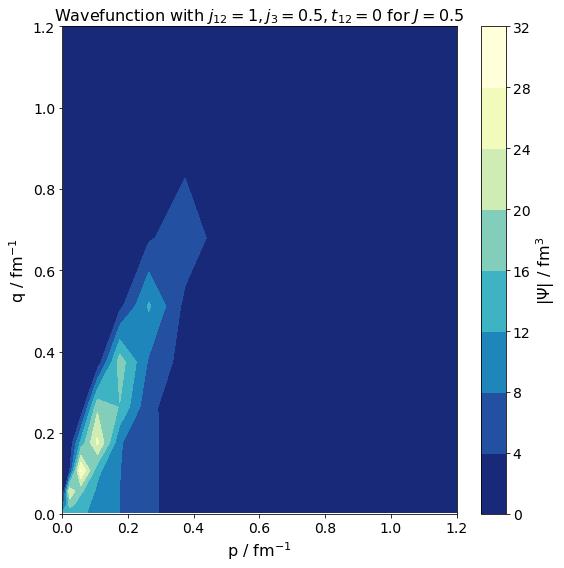

In [9]:
# momentum grids are the same for each kernel, so can just use any of them
k = kernel
pgrid = k.pgrid
qgrid = k.qgrid

# quantum numbers associated to this particular alpha index
# alpha_list = k.qnalpha[alpha_idx]
# print(alpha_list)
alpha_dict = k.qnalpha[0]
alpha_idx = alpha_dict["alpha"]
print(alpha_idx)
qm_numbers = [alpha_dict["j"], alpha_dict["j3"], alpha_dict["t"]]

# create combined grid
P, Q = np.meshgrid(pgrid, qgrid)

# plotting the results
wf = np.abs(wf1[alpha_idx,:,:])  # take abs value

fig, ax = plt.subplots(figsize=(8,8))
im = ax.contourf(P, Q, wf, vmin=np.min(wf), vmax=np.max(wf), cmap=plt.cm.YlGnBu_r)
ax.set_xlabel("p / fm$^{{-1}}$", fontsize=16)
ax.set_ylabel("q / fm$^{{-1}}$", fontsize=16)
# if bj_idx == 0:
ax.set_xlim([0,1.2])
ax.set_ylim([0,1.2])
ax.set_title("Wavefunction with $j_{{12}}={0}, j_3={1}, t_{{12}}={2}$ for $J={3}$".format(*qm_numbers, 0.5), fontsize=16)

cbar = fig.colorbar(im)
cbar.ax.set_ylabel("$|\Psi|$ / fm$^3$", fontsize=16)

ax.tick_params(axis='both', which='major', labelsize=14)
cbar.ax.tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()
# plt.savefig(os.path.join(ferm_path, ferm_contour_templ.format(alpha_idx, bj)), dpi=300)

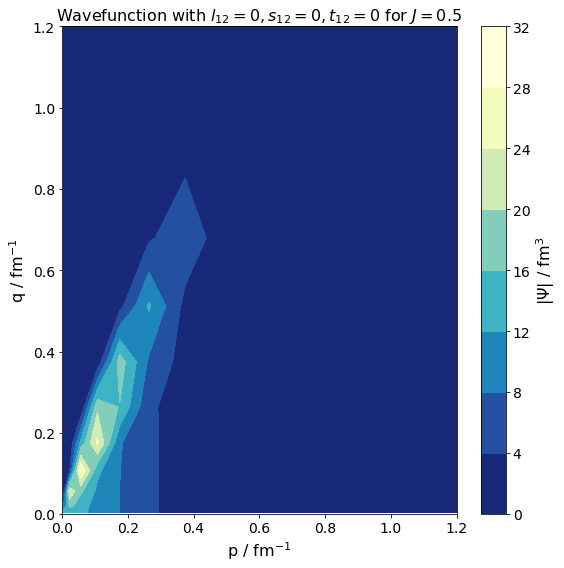

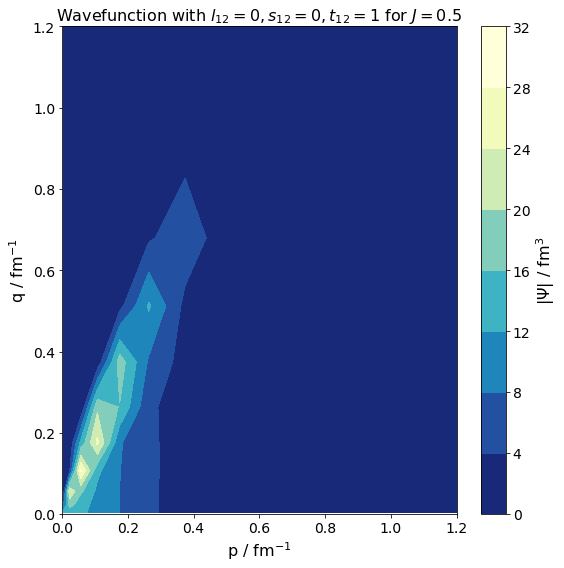

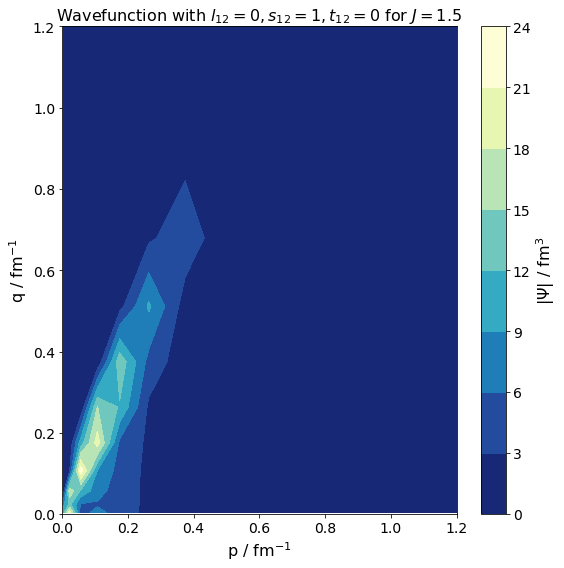

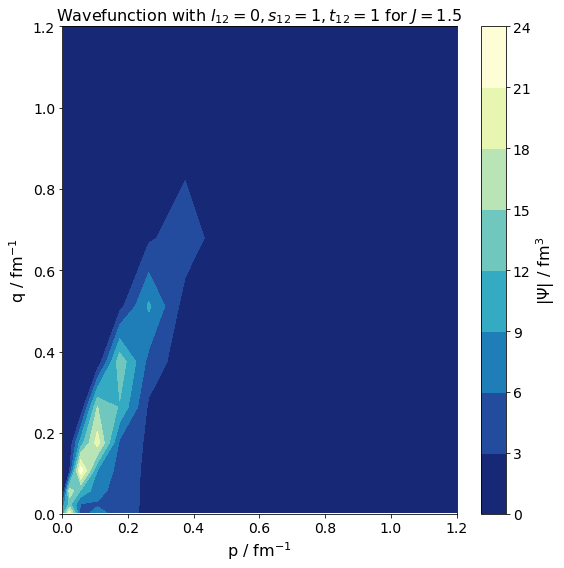

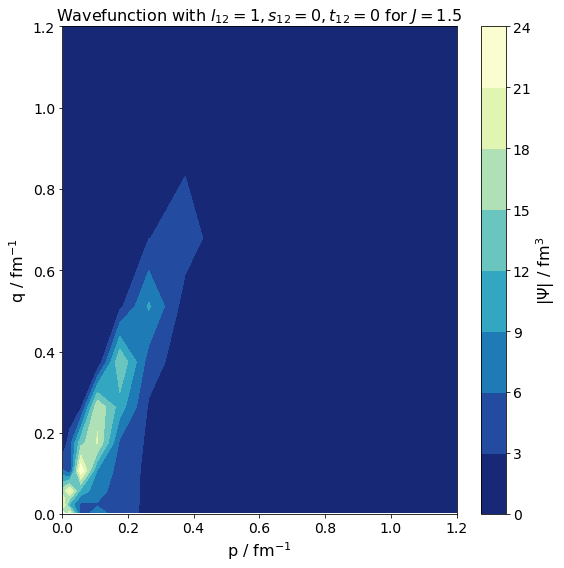

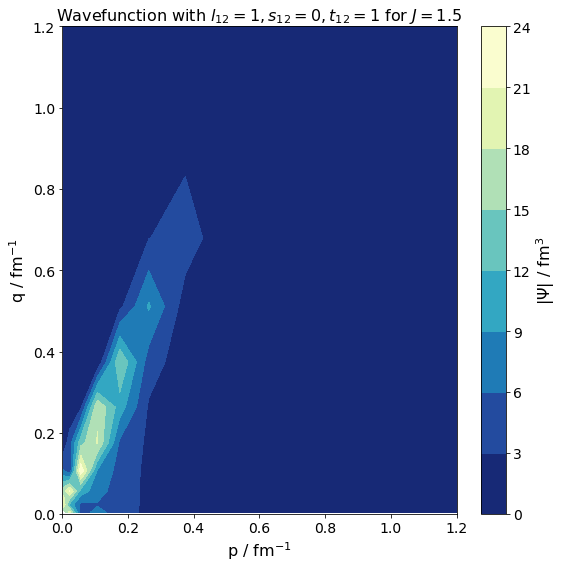

In [7]:
# contour plots

bj_list=[0.5,1.5]

ferm_path = os.path.join(dir_to_images, "fermion")

ferm_contour_templ = "ferm_contour_alpha{0}_bj{1}.png"

for bj_idx, bj in enumerate(bj_list):
    # momentum grids are the same for each kernel, so can just use any of them
    k = wf_list[bj_idx]["kernel"]
    pgrid = k.pgrid
    qgrid = k.qgrid
    # alpha_idces = [0,1,10,-1]

    


    for alpha_dict in k.qnalpha:
        # quantum numbers associated to this particular alpha index
        # alpha_list = k.qnalpha[alpha_idx]
        # print(alpha_list)
        alpha_idx = alpha_dict["alpha"]
        qm_numbers =[alpha_dict["l"], alpha_dict["s"], alpha_dict["t"]]

        # create combined grid
        P, Q = np.meshgrid(pgrid, qgrid)

        # plotting the results
        wf = np.abs(wf_list[bj_idx]["wf"][alpha_idx,:,:])  # take abs value
        
        fig, ax = plt.subplots(figsize=(8,8))
        im = ax.contourf(P, Q, wf, vmin=np.min(wf), vmax=np.max(wf), cmap=plt.cm.YlGnBu_r)
        ax.set_xlabel("p / fm$^{{-1}}$", fontsize=16)
        ax.set_ylabel("q / fm$^{{-1}}$", fontsize=16)
        # if bj_idx == 0:
        ax.set_xlim([0,1.2])
        ax.set_ylim([0,1.2])
        ax.set_title("Wavefunction with $l_{{12}}={0}, s_{{12}}={1}, t_{{12}}={2}$ for $J={3}$".format(*qm_numbers, bj), fontsize=16)
        
        cbar = fig.colorbar(im)
        cbar.ax.set_ylabel("$|\Psi|$ / fm$^3$", fontsize=16)

        ax.tick_params(axis='both', which='major', labelsize=14)
        cbar.ax.tick_params(axis='both', which='major', labelsize=14)

        fig.tight_layout()
        plt.savefig(os.path.join(ferm_path, ferm_contour_templ.format(alpha_idx, bj)), dpi=300)

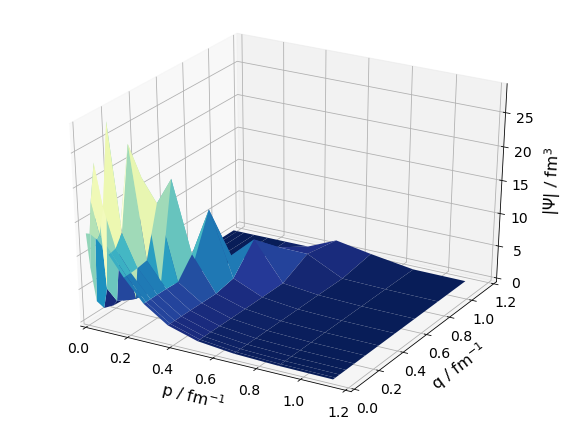

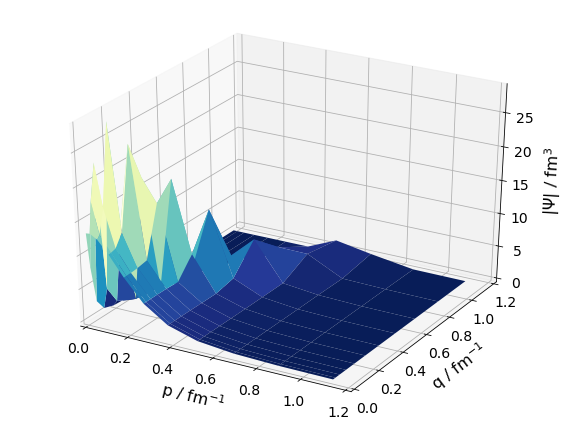

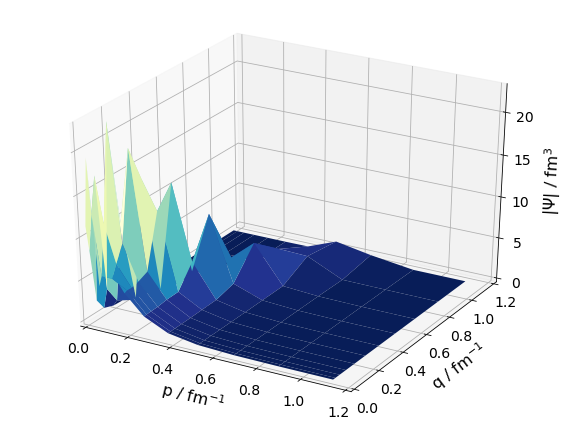

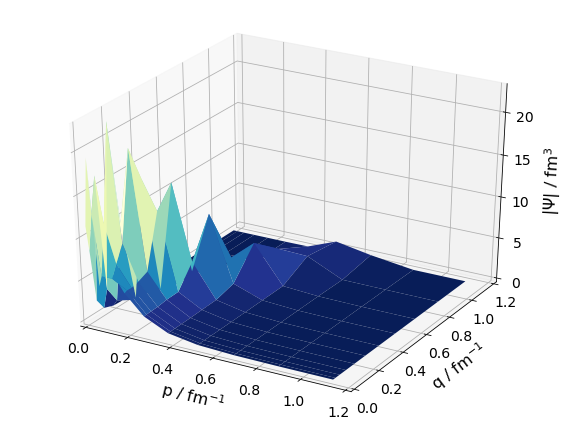

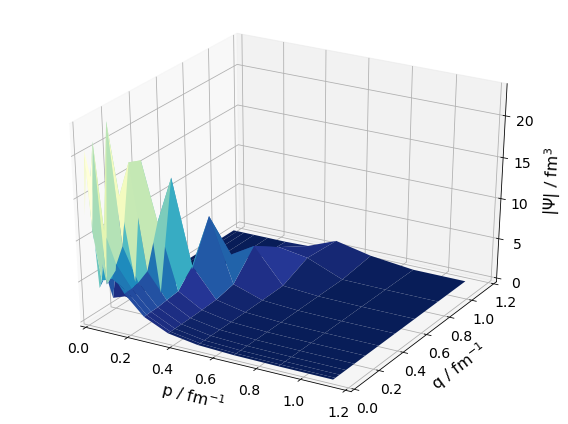

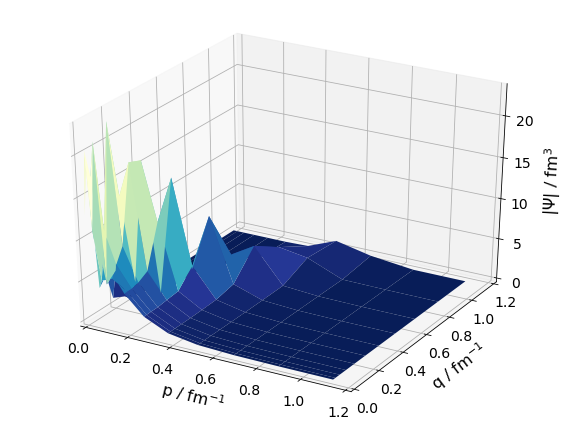

In [13]:
# 3d plots

bj_list=[0.5, 1.5]
# momentum grids are the same for each kernel, so can just use any of them
# pgrid = kernel.pgrid
# qgrid = kernel.qgrid
# alpha_idx = 0

# quantum numbers associated to this particular alpha index
# qm_numbers = list(kernel.qnalpha[alpha_idx].values())[1:]
# print("Configuration for alpha chosen: ", qm_numbers)

# perform truncation to some upper limit for p, q

ferm_3d_templ = "ferm_3d_alpha{0}_bj{1}.png"

for bj_idx, bj in enumerate(bj_list):
    # momentum grids are the same for each kernel, so can just use any of them
    k = wf_list[bj_idx]["kernel"]
    pgrid = k.pgrid
    qgrid = k.qgrid
    
    # alpha_idces = [0, 1, 10, -1]

    for alpha_dict in k.qnalpha:
        # quantum numbers associated to this particular alpha index
        # alpha_list = k.qnalpha[alpha_idx]
        # print(alpha_list)
        alpha_idx = alpha_dict["alpha"]
        qm_numbers = [alpha_dict["l"], alpha_dict["s"], alpha_dict["t"]]

        # pmax = 1.2 if bj_idx == 0 else np.max(pgrid)
        # qmax = 1.2 if bj_idx == 0 else np.max(qgrid)
        pmax=1.2
        qmax=1.2
        pmax_idx = np.argwhere(pgrid >= pmax)[0][0]
        qmax_idx = np.argwhere(qgrid >= qmax)[0][0]
        pgrid_new = pgrid[:pmax_idx]
        qgrid_new = qgrid[:qmax_idx]

        # create combined grid
        P, Q = np.meshgrid(pgrid_new, qgrid_new)

        # plotting the results
        wf = np.abs(wf_list[bj_idx]["wf"][alpha_idx,:pmax_idx,:qmax_idx])  # take abs value
        
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111, projection='3d')
        im = ax.plot_surface(P, Q, wf,cmap=plt.cm.YlGnBu_r)
        ax.set_xlabel("p / fm$^{{-1}}$", fontsize=16, labelpad=10)
        ax.set_ylabel("q / fm$^{{-1}}$", fontsize=16, labelpad=10)
        ax.set_zlabel("$|\Psi|$ / fm$^3$", fontsize=16, labelpad=10)
        ax.set_xlim([0,pmax])
        ax.set_ylim([0,qmax])
        # ax.set_title("Wavefunction with $j_{{12}}={0}, j_3={1}, t_{{12}}={2}$ for $J={3}$".format(*qm_numbers, bj))
        
        # cbar = fig.colorbar(im)
        # cbar.ax.set_ylabel("$|\Psi|$ / fm$^3$", fontsize=14)

        # ax.set_xlabel("p / fm$^{{-1}}$", fontsize=16, labelpad=12)
        # ax.set_ylabel("p' / fm$^{{-1}}$", fontsize=16, labelpad=12)
        # ax.set_zlabel(r"$t_{\alpha}(p,p^\prime,q)$", fontsize=16, labelpad=10)
        ax.tick_params(axis='both', which='major', labelsize=14)

        fig.tight_layout()

        plt.savefig(os.path.join(ferm_path, ferm_3d_templ.format(alpha_idx, bj)), dpi=300)

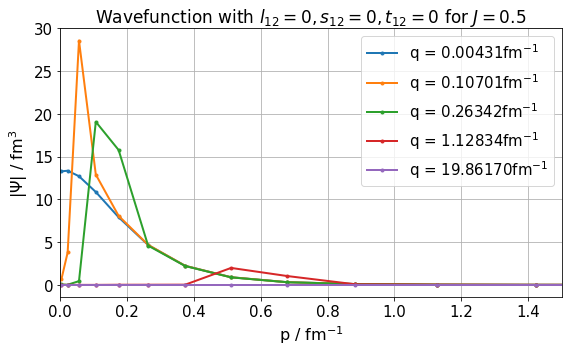

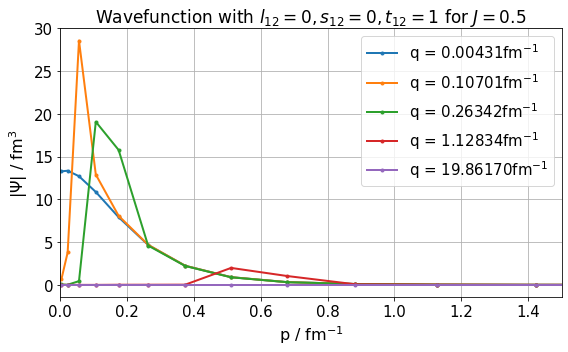

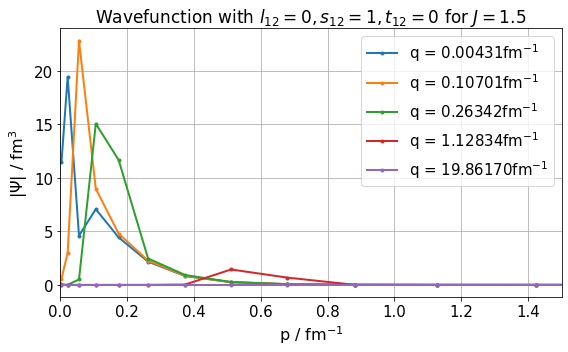

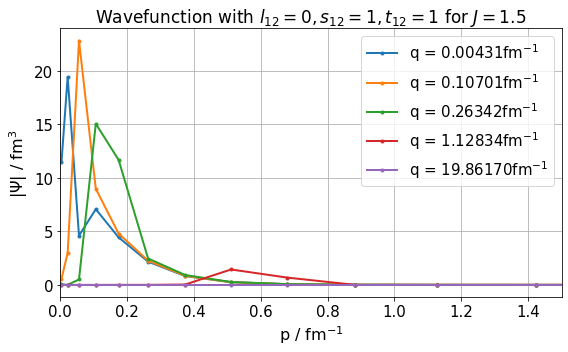

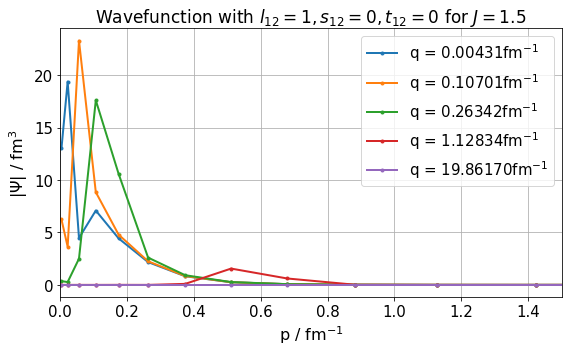

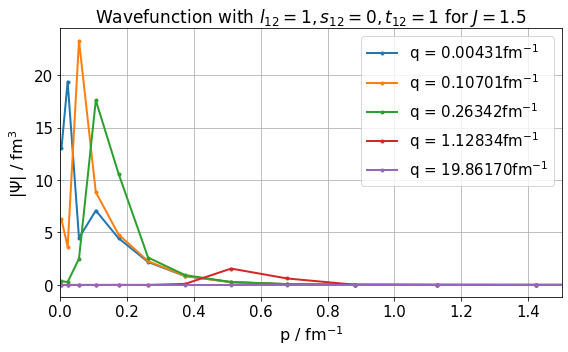

In [34]:
# projection onto one particular q-value
q_idces = [0,3,5,10,-1]

bj_list=[0.5, 1.5]

ferm_path = os.path.join(dir_to_images, "fermion")

ferm_qproj_templ = "ferm_qproj_alpha{0}_bj{1}.png"


for bj_idx, bj in enumerate(bj_list):
    # momentum grids are the same for each kernel, so can just use any of them
    k = wf_list[bj_idx]["kernel"]
    pgrid = k.pgrid
    qgrid = k.qgrid
    
    # alpha_idces = [0,1,10,-1]

    for alpha_dict in k.qnalpha:
        # quantum numbers associated to this particular alpha index
        # alpha_list = k.qnalpha[alpha_idx]
        # print(alpha_list)
        alpha_idx = alpha_dict["alpha"]
        qm_numbers = [alpha_dict["l"], alpha_dict["s"], alpha_dict["t"]]

        fig, ax = plt.subplots(figsize=(8,5))
        for q_idx in q_idces:
            
            qval = qgrid[q_idx]
            # create combined grid
            # P, Q = np.meshgrid(pgrid, qgrid)

            # plotting the results
            wf = np.abs(wf_list[bj_idx]["wf"][alpha_idx,q_idx,:])  # take abs value
            
            
            # im = ax.qprojf(P, Q, wf, vmin=np.min(wf), vmax=np.max(wf), cmap=plt.cm.YlGnBu_r)
            ax.plot(pgrid, wf, marker="o", lw=2.0, ms=3.0, label="q = {0:.5f}fm$^{{-1}}$".format(qval))

        ax.set_xlabel("p / fm$^{{-1}}$", fontsize=16)
        ax.set_ylabel("$|\Psi|$ / fm$^3$", fontsize=16)
        # if bj_idx == 0:
        #     ax.set_xlim([0,1.2])
        #     ax.set_ylim([0,1.2])
        ax.set_xlim([0,1.5])
        ax.set_title("Wavefunction with $l_{{12}}={0}, s_{{12}}={1}, t_{{12}}={2}$ for $J={3}$".format(*qm_numbers, bj), fontsize=17)

        # cbar = fig.colorbar(im)
        # cbar.ax.set_ylabel("$|\Psi|$", fontsize=14)
        ax.grid()
        ax.legend(prop={"size":15})

        ax.tick_params(axis='both', which='major', labelsize=15)

        fig.tight_layout()

        plt.savefig(os.path.join(ferm_path, ferm_qproj_templ.format(alpha_idx, bj)), dpi=300)

In [19]:
# print kinetic energy
for bj_idx, bj in enumerate(bj_list):
    ekin = wf_list[bj_idx]["ekin"]
    print("energy is: {0} MeV".format(ekin))

energy is: 15.019496793367285 MeV
energy is: 3.463168954380013 MeV


### Fermionic vs Bosonic case

Compare fermionic vs bosonic case for J=1/2
- for fermion case, we use the `wf_list` above

In [3]:
wf_list_b = []

pot=OBEpot(nx=24,mpi=138.0,C0=para[1],A=-1.0/6.474860194946856,cutoff=para[0])

# evaluate bosonic case
for bl in [0, 1]:
    kernel_boson=ThreeBody(pot,nx=8,np1=20,np2=12,nq1=20,nq2=12,lmax=3, bl=bl)
    # ener_b,eta_b,fadcomp_b=kernel_boson.esearch(neigv=1,e1=-0.05,e2=-0.06,elow=-0.02,tol=1e-5)
    eigv, fadcomp_b = kernel_boson.eigv_iter(E=-0.09982737243887346, neigv=1)
    wf_b = kernel_boson.wavefunc(fadcomp_b)
    ekin_b = kernel_boson.eval_ekin(fadcomp_b, wf_b) * kernel.hbarc
    
    print(ekin_b)

    # print("Ener: ", ener_b, eta_b)

    wf_dict_boson={}

    wf_dict_boson["wf"] = wf_b
    wf_dict_boson["ekin"] = ekin_b
    wf_dict_boson["kernel"] = kernel_boson

    wf_list_b.append(wf_dict_boson)

(2048,)
57.46181631039482
(4096,)
1184.9082550593869


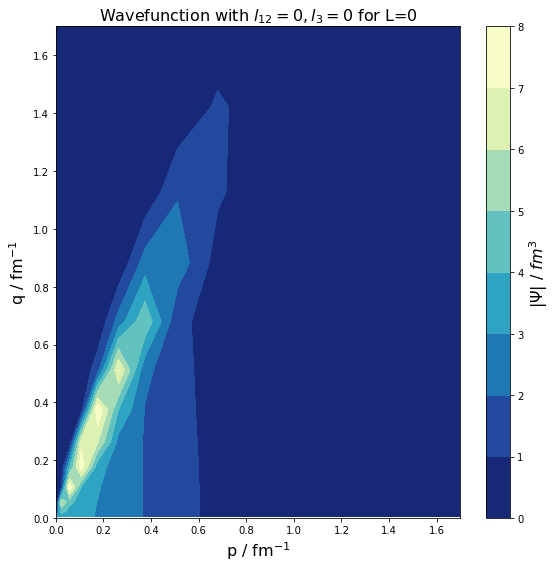

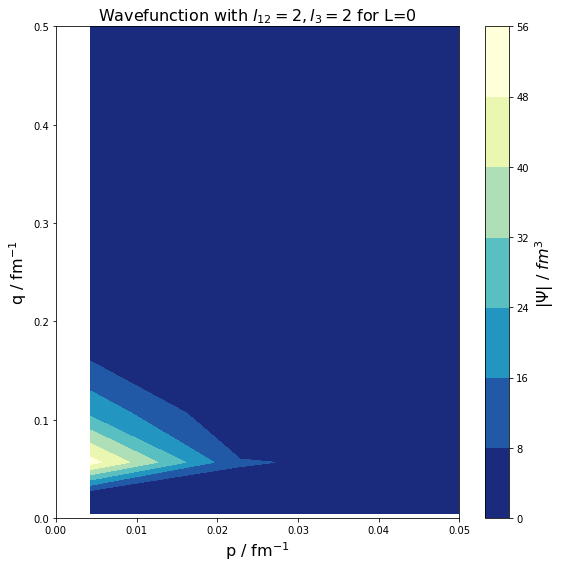

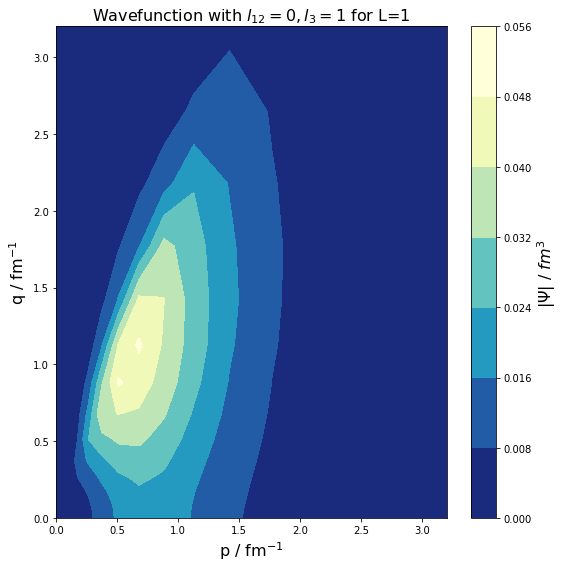

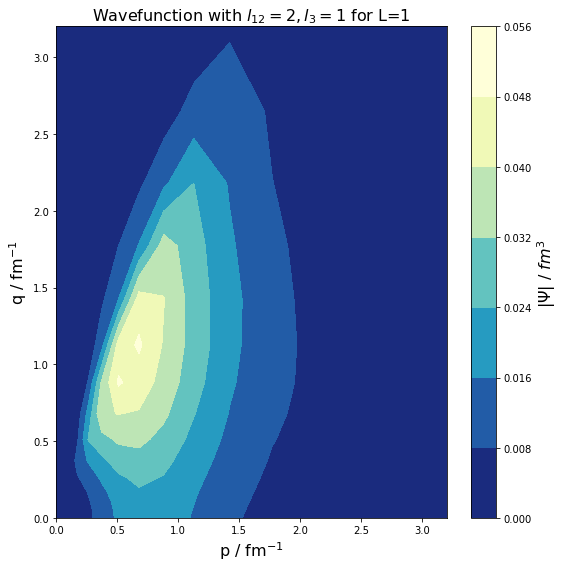

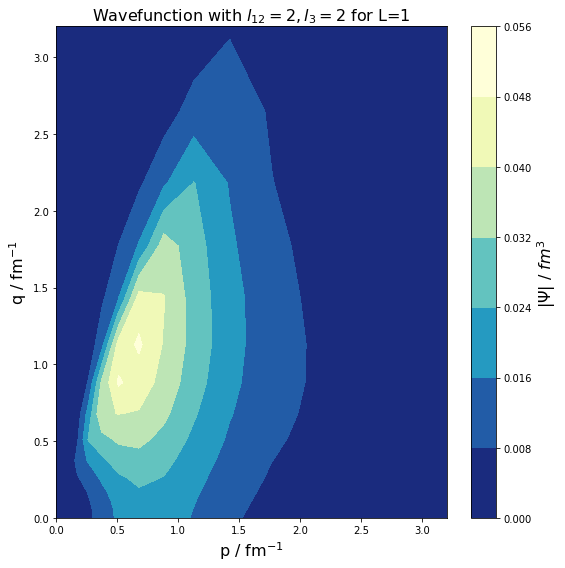

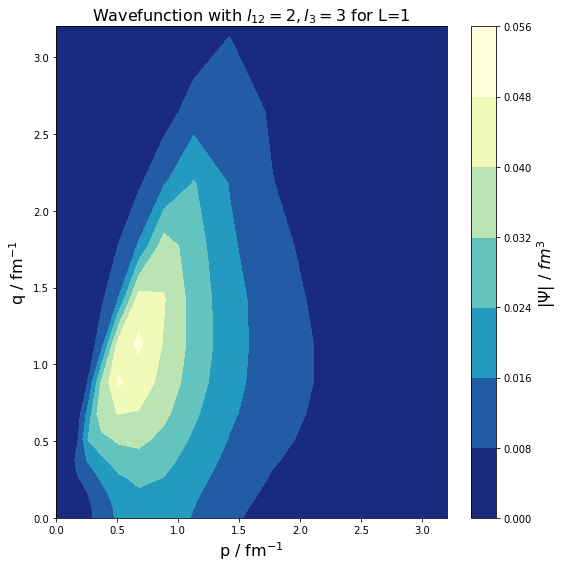

In [9]:
# contour plots
bos_path = os.path.join(dir_to_images, "boson")

bos_contour_templ = "bos_contour_alpha{0}_bl{1}"

lim_list = [[(0,1.7),(0,1.7)], [(0,0.05),(0,0.5)], [(0,3.2),(0,3.2)], [(0,0.05), (0,0.6)]]

# qlim_list = [, (0,0.5), (0,3),(0,0.6)]

for bl in [0,1]:
    # momentum grids are the same for each kernel, so can just use any of them
    k = wf_list_b[bl]["kernel"]
    pgrid = k.pgrid
    qgrid = k.qgrid
    # alpha_idx = 0  # corresponds to lindex in 

    for alpha_dict in k.qnalpha:


        # quantum numbers associated to this particular alpha index
        # alpha_list = alpha_dict[alpha_idx]
        # print(alpha_list)
        alpha_idx = alpha_dict["alpha"]
        qm_numbers = [alpha_dict["l"], alpha_dict["lam"], alpha_dict["bl"]]
        l12 = alpha_dict["l"]

        # create combined grid
        P, Q = np.meshgrid(pgrid, qgrid)

        # plotting the results
        wf = np.abs(wf_list_b[bl]["wf"][alpha_idx,:,:])  # take abs value

        fig, ax = plt.subplots(figsize=(8,8))
        im = ax.contourf(P, Q, wf, vmin=np.min(wf), vmax=np.max(wf), cmap=plt.cm.YlGnBu_r)
        ax.set_xlabel("p / fm$^{{-1}}$", fontsize=16)
        ax.set_ylabel("q / fm$^{{-1}}$", fontsize=16)

        # set limits based on l12, L
        if bl == 0:
            if l12 == 0:
                plim, qlim = lim_list[0]
            elif l12 == 2:
                plim, qlim = lim_list[1]
            elif l12 == 4:
                plim, qlim = lim_list[3]
        elif bl == 1:
            if l12 == 4:
                plim, qlim = lim_list[3]
            else:
                plim, qlim = lim_list[2]

        ax.set_xlim(plim)
        ax.set_ylim(qlim)
        ax.set_title("Wavefunction with $l_{{12}}={0}, l_3={1}$ for L={2}".format(*qm_numbers), fontsize=16)

        cbar = fig.colorbar(im)
        cbar.ax.set_ylabel("$|\Psi|$ / $fm^3$", fontsize=16)

        fig.tight_layout()
        # plt.savefig(os.path.join(bos_path, bos_contour_templ.format(alpha_idx, bl)), dpi=300)

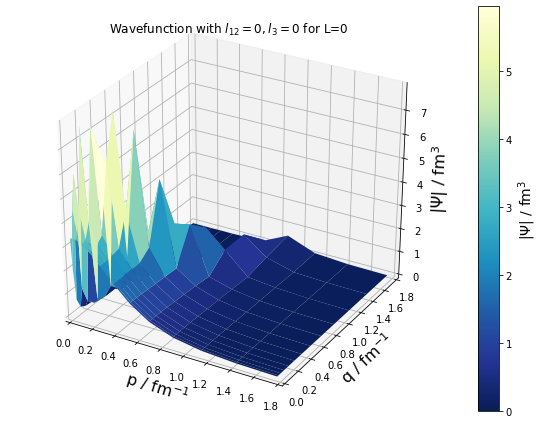

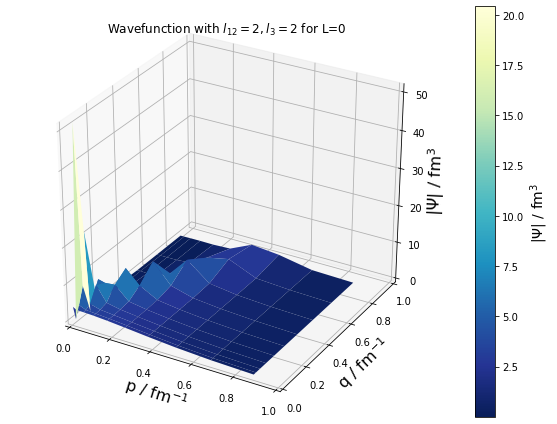

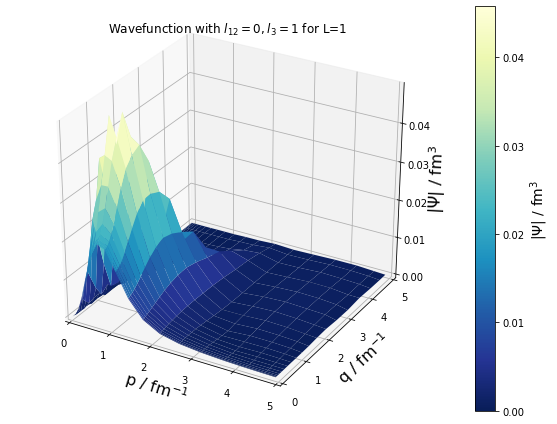

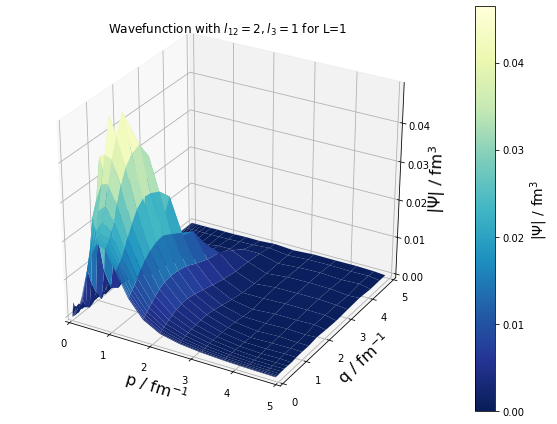

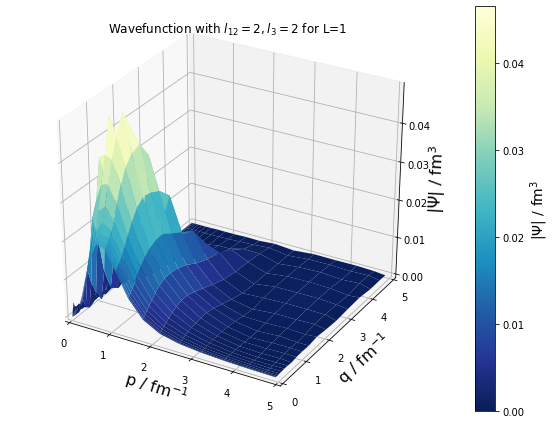

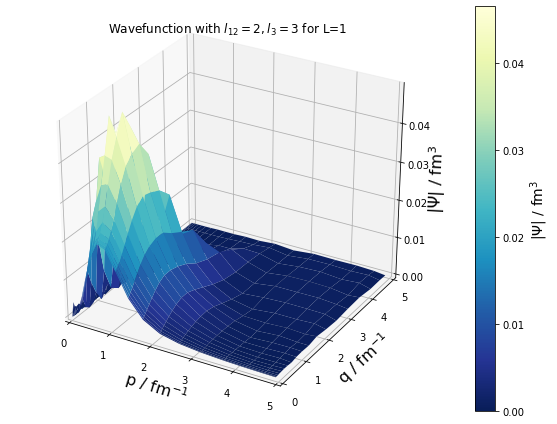

In [10]:
# 3d plots

bj_list=[0.5]
# momentum grids are the same for each kernel, so can just use any of them
# pgrid = kernel.pgrid
# qgrid = kernel.qgrid
# alpha_idx = 0

# quantum numbers associated to this particular alpha index
# qm_numbers = list(kernel.qnalpha[alpha_idx].values())[1:]
# print("Configuration for alpha chosen: ", qm_numbers)

# perform truncation to some upper limit for p, q

bos_3d_templ = "bos_3d_alpha{0}_bl{1}.png"

max_list = [(1.8, 1.8), (1, 1), (5,5), (2, 2)] 

for bl_idx, bl in enumerate([0,1]):
    # momentum grids are the same for each kernel, so can just use any of them
    k = wf_list_b[bl_idx]["kernel"]
    pgrid = k.pgrid
    qgrid = k.qgrid
    
    # alpha_idces = [0, 1, 10, -1]

    for alpha_dict in k.qnalpha:
        # quantum numbers associated to this particular alpha index
        # alpha_list = k.qnalpha[alpha_idx]
        # print(alpha_list)
        alpha_idx = alpha_dict["alpha"]
        qm_numbers = [alpha_dict["l"], alpha_dict["lam"], alpha_dict["bl"]]

        l12 = alpha_dict["l"]

        # set limits based on l12, L
        if bl == 0:
            if l12 == 0:
                pmax, qmax = max_list[0]
            elif l12 == 2:
                pmax, qmax = max_list[1]
            elif l12 == 4:
                pmax, qmax = max_list[3]
        elif bl == 1:
            if l12 == 4:
                pmax, qmax = max_list[3]
            else:
                pmax, qmax = max_list[2]

        pmax_idx = np.argwhere(pgrid >= pmax)[0][0]
        qmax_idx = np.argwhere(qgrid >= qmax)[0][0]
        pgrid_new = pgrid[:pmax_idx]
        qgrid_new = qgrid[:qmax_idx]

        # create combined grid
        P, Q = np.meshgrid(pgrid_new, qgrid_new)

        # plotting the results
        wf = np.abs(wf_list_b[bl_idx]["wf"][alpha_idx,:pmax_idx,:qmax_idx])  # take abs value
        
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111, projection='3d')
        im = ax.plot_surface(P, Q, wf,cmap=plt.cm.YlGnBu_r)
        ax.set_xlabel("p / fm$^{{-1}}$", fontsize=16)
        ax.set_ylabel("q / fm$^{{-1}}$", fontsize=16)
        ax.set_zlabel("$|\Psi|$ / fm$^3$", fontsize=16)
        ax.set_xlim([0,pmax])
        ax.set_ylim([0,qmax])
        ax.set_title("Wavefunction with $l_{{12}}={0}, l_3={1}$ for L={2}".format(*qm_numbers))
        
        cbar = fig.colorbar(im)
        cbar.ax.set_ylabel("$|\Psi|$ / fm$^3$", fontsize=14)

        fig.tight_layout()
        # plt.savefig(os.path.join(bos_path, bos_3d_templ.format(alpha_idx, bl)), dpi=300)

0.004305720383272085
0.10700779435929396
0.263417657066271
1.1283350549924236


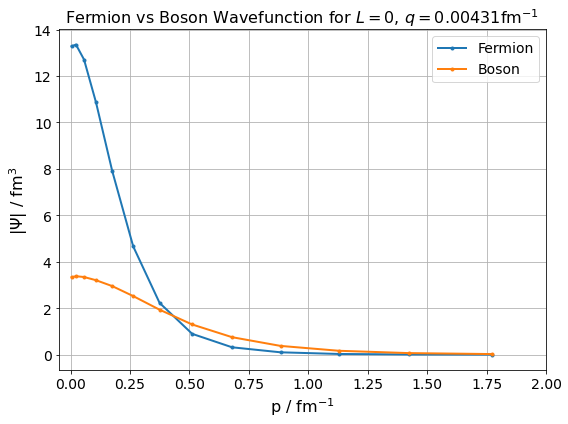

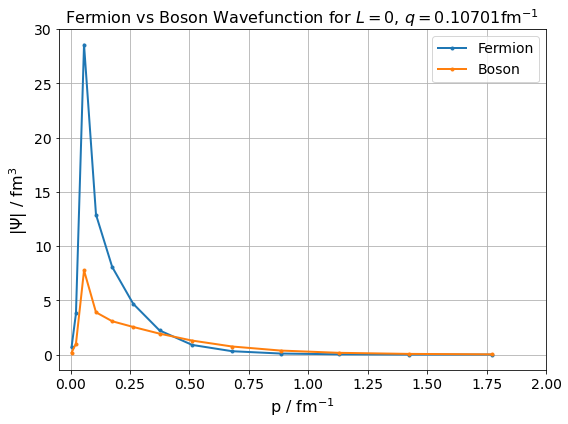

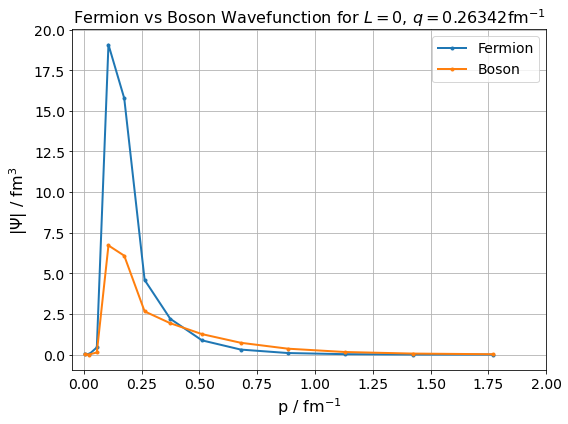

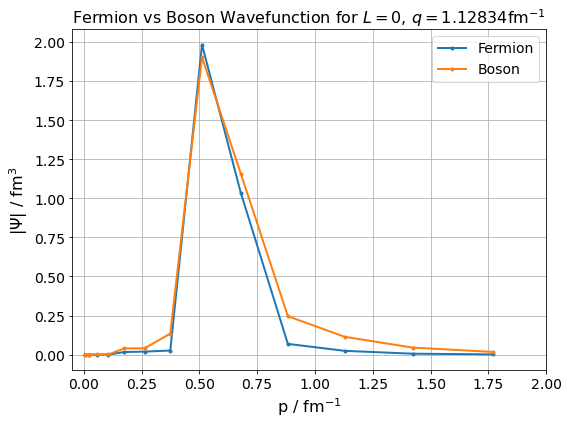

In [14]:
# compare projection plots between fermion and boson case
# plot both angular states on one plot, for particular q and alpha
# projection onto one particular q-value
q_idces = [0,3,5,10]
alpha_idx = 0

bl_idx = 0   # J=0.5, L=0
bl = 0
# bj_list=[0.5]


for q_idx in q_idces:
    # ferm_path = os.path.join(dir_to_images, "fermion")

    bos_compfer_templ = "bos_compfer_alpha{0}_bj{1}_q{2:.0f}.png"

    fig, ax = plt.subplots(figsize=(8,6))

    # for fermion case first
    # momentum grids are the same for each kernel, so can just use any of them
    k = wf_list[bl_idx]["kernel"]
    pgrid = k.pgrid
    qgrid = k.qgrid
    qval = qgrid[q_idx]
    alpha_dict = k.qnalpha[alpha_idx]

    qm_numbers = [alpha_dict["j"], alpha_dict["j3"], alpha_dict["t"]]

    # create combined grid
    # P, Q = np.meshgrid(pgrid, qgrid)

    # max momentum to look at
    pmax = 2.0
    pmax_idx = np.argwhere(pgrid >= pmax)[0][0]
    pgrid_new = pgrid[:pmax_idx]

    # plotting the results
    wf = np.abs(wf_list[bl_idx]["wf"][alpha_idx,q_idx,:pmax_idx])  # take abs value
        
    # im = ax.compJf(P, Q, wf, vmin=np.min(wf), vmax=np.max(wf), cmap=plt.cm.YlGnBu_r)
    ax.plot(pgrid_new, wf, marker="o", lw=2.0, ms=3.0, label="Fermion")

    # now boson case
    k_b = wf_list_b[bl_idx]["kernel"]
    pgrid_b = k_b.pgrid
    qgrid = k_b.qgrid
    qval = qgrid[q_idx]
    print(qval)
    alpha_dict = k_b.qnalpha[alpha_idx]

    qm_numbers = [alpha_dict["l"], alpha_dict["lam"]]

    # create combined grid
    # P, Q = np.meshgrid(pgrid, qgrid)
    pmax = 2.0
    pmax_idx_b = np.argwhere(pgrid_b >= pmax)[0][0]
    pgrid_b_new = pgrid_b[:pmax_idx_b]

    # plotting the results
    wf_b = np.abs(wf_list_b[bl_idx]["wf"][alpha_idx,q_idx,:pmax_idx_b])  # take abs value
        
    # im = ax.compJf(P, Q, wf, vmin=np.min(wf), vmax=np.max(wf), cmap=plt.cm.YlGnBu_r)
    ax.plot(pgrid_b_new, wf_b, marker="o", lw=2.0, ms=3.0, label="Boson")

    ax.set_xlabel("p / fm$^{{-1}}$", fontsize=16)
    ax.set_ylabel("$|\Psi|$ / fm$^3$", fontsize=16)
        # if bj_idx == 0:
        #     ax.set_xlim([0,1.2])
        #     ax.set_ylim([0,1.2])
    ax.set_xlim([-0.05,pmax])
    # ax.set_title("Wavefunction with $j_{{12}}={0}, j_3={1}, t_{{12}}={2}$ for $q={3:.2f}$fm$^{{-1}}$".format(*qm_numbers, qval))
    ax.set_title("Fermion vs Boson Wavefunction for $L={0}$, $q={1:.5f}$fm$^{{-1}}$".format(bl, qval), fontsize=16)
        # cbar = fig.colorbar(im)
        # cbar.ax.set_ylabel("$|\Psi|$", fontsize=14)

    ax.legend(prop={"size":14})
    ax.grid()

    ax.tick_params(axis='both', which='major', labelsize=14)
    
    fig.tight_layout()
    plt.savefig(os.path.join(bos_path, bos_compfer_templ.format(alpha_idx, bj, q_idx)), dpi=300)



13.353705297470242
0.004305720383272085
3.3778448503565395
28.572832855884588
0.10700779435929396
7.7594021269613656
19.07739499076769
0.263417657066271
6.718120029595329
1.9838725915359174
1.1283350549924236
1.903119810483909


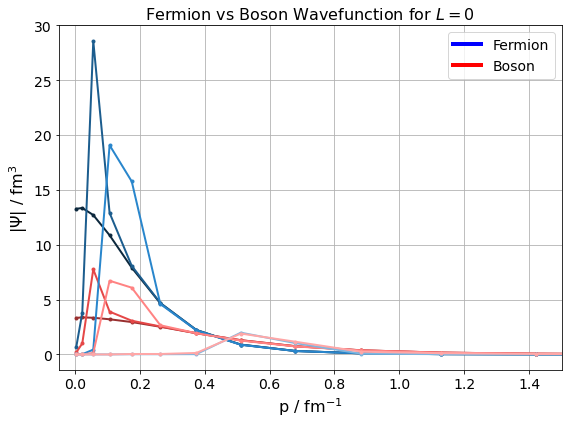

In [32]:
# compare projection plots between fermion and boson case
# plot both angular states on one plot, for particular q and alpha
# projection onto one particular q-value
q_idces = [0,3,5,10]
color_list = [("#7eb6e0", "#ffa7a7"), ("#2986cc", "#ff8383"), ("#1c5d8e", "#e54747"), ("#0c283d", "#992f2f")][::-1]
alpha_idx = 0

bl_idx = 0   # J=0.5, L=0
bl = 0
# bj_list=[0.5]
bos_compfer_templ = "bos_compfer_alpha{0}_bl{1}.png"

fig, ax = plt.subplots(figsize=(8,6))
from matplotlib.lines import Line2D

for i, q_idx in enumerate(q_idces):
    # ferm_path = os.path.join(dir_to_images, "fermion")

    

    # for fermion case first
    # momentum grids are the same for each kernel, so can just use any of them
    k = wf_list[bl_idx]["kernel"]
    pgrid = k.pgrid
    qgrid = k.qgrid
    qval = qgrid[q_idx]
    alpha_dict = k.qnalpha[alpha_idx]

    qm_numbers = [alpha_dict["j"], alpha_dict["j3"], alpha_dict["t"]]

    # create combined grid
    # P, Q = np.meshgrid(pgrid, qgrid)

    # max momentum to look at
    pmax = 1.5
    pmax_idx = np.argwhere(pgrid >= pmax)[0][0]+2
    pgrid_new = pgrid[:pmax_idx]

    # plotting the results
    wf = np.abs(wf_list[bl_idx]["wf"][alpha_idx,q_idx,:pmax_idx])  # take abs value

    print(np.max(wf))
        
    # im = ax.compJf(P, Q, wf, vmin=np.min(wf), vmax=np.max(wf), cmap=plt.cm.YlGnBu_r)
    ax.plot(pgrid_new, wf, marker="o", lw=2.0, ms=3.0, color=color_list[i][0])

    # now boson case
    k_b = wf_list_b[bl_idx]["kernel"]
    pgrid_b = k_b.pgrid
    qgrid = k_b.qgrid
    qval = qgrid[q_idx]
    print(qval)
    alpha_dict = k_b.qnalpha[alpha_idx]

    qm_numbers = [alpha_dict["l"], alpha_dict["lam"]]

    # create combined grid
    # P, Q = np.meshgrid(pgrid, qgrid)
    pmax = 1.5
    pmax_idx_b = np.argwhere(pgrid_b >= pmax)[0][0]+2
    pgrid_b_new = pgrid_b[:pmax_idx_b]

    # plotting the results
    wf_b = np.abs(wf_list_b[bl_idx]["wf"][alpha_idx,q_idx,:pmax_idx_b])  # take abs value
    print(np.max(wf_b))
        
    # im = ax.compJf(P, Q, wf, vmin=np.min(wf), vmax=np.max(wf), cmap=plt.cm.YlGnBu_r)
    ax.plot(pgrid_b_new, wf_b, marker="o", lw=2.0, ms=3.0, color=color_list[i][1])

ax.set_xlabel("p / fm$^{{-1}}$", fontsize=16)
ax.set_ylabel("$|\Psi|$ / fm$^3$", fontsize=16)
    # if bj_idx == 0:
    #     ax.set_xlim([0,1.2])
    #     ax.set_ylim([0,1.2])
ax.set_xlim([-0.05,pmax])
# ax.set_title("Wavefunction with $j_{{12}}={0}, j_3={1}, t_{{12}}={2}$ for $q={3:.2f}$fm$^{{-1}}$".format(*qm_numbers, qval))
ax.set_title("Fermion vs Boson Wavefunction for $L={0}$".format(0), fontsize=16)
    # cbar = fig.colorbar(im)
    # cbar.ax.set_ylabel("$|\Psi|$", fontsize=14)

custom_lines = [Line2D([0], [0], color="b", lw=4),
            Line2D([0], [0], color="r", lw=4)]

ax.legend(custom_lines, ["Fermion", "Boson"], prop={"size":14})
ax.grid()

ax.tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()
plt.savefig(os.path.join(bos_path, bos_compfer_templ.format(alpha_idx, bl)), dpi=300)



In [12]:
# kinetic energy
for bl_idx, bl in enumerate([0,1]):
    ekin = wf_list_b[bl_idx]["ekin"]
    print("energy for bl ={1} is: {0} MeV".format(ekin, bl))

energy for bl =0 is: 57.46181631039482 MeV
energy for bl =1 is: 1184.9082550593869 MeV
